In [76]:
from voidiness import voidy_analysis
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

In [77]:
# 12m 36.6s seconds to run. WOW
# filtered_sdss_dr16 = voidy_analysis('exported_dataFrames/voids.xlsx','exported_dataFrames/z_ra_dec_filtered_SDSS_DR16.xlsx') # commented out since its saved and it takes 13 minutes to run
# Saving so i don't have to wait 13 minutes for it to calculate
# This also takes 1m 35s to save. wow
# filtered_sdss_dr16.to_excel('exported_dataFrames/sdss_dr16_w_voidiness.xlsx')

sdss_dr16 = pd.read_excel('exported_dataFrames/sdss_dr16_w_voidiness.xlsx')


In [78]:

four_lac = voidy_analysis('exported_dataFrames/voids.xlsx','exported_dataFrames/z_ra_dec_filtered_4lac.xlsx' )
# four_lac.to_excel('exported_dataFrames/4lac_w_voidiness.xlsx', index=False)
xray_agns = voidy_analysis('exported_dataFrames/voids.xlsx', 'exported_dataFrames/z_ra_dec_filtered_xray_agns.xlsx' )
# xray_agns.to_excel('exported_dataFrames/SBAT104_w_voidiness.xlsx', index = False)
soft_xrays = voidy_analysis('exported_dataFrames/voids.xlsx','exported_dataFrames/z_ra_dec_filtered_ROMABZCAT.xlsx' )
# soft_xrays.to_excel('exported_dataFrames/ROMABZCAT_w_voidiness.xlsx', index= False)

In [79]:
# Base plotting code, the only thing we tweak is the data we're plotting.
# The bins and label

def custom_plot_hist(data, labels, bins, cumulative = False, density=None):

    if density == None:
        density = [True]*len(data)
        
    for dat, label, bin in zip(data, labels, bins):
        plt.hist([dat], 
            bins=bin, 
            histtype="step", 
            density=density, 
            stacked=False,
            label=label,
            cumulative=cumulative)
        
    plt.xlabel('Voidiness [$D_{\\rm Void}/D_{\\rm Total}$]')
    plt.ylabel('Normalized Fraction')
    plt.title('Voidiness Histogram')

    plt.grid()

    plt.legend()

    plt.text(0.5, 0.5, 'Preliminary',  # Adjust the position as needed
                fontsize=30, color='gray', alpha=0.5,
                ha='center', va='center', transform=plt.gca().transAxes)

    plt.tight_layout()
    plt.show()


In [80]:
four_lac.TeVflag

Unnamed: 0
1107    NaN
1108    NaN
1120    NaN
1130    NaN
1131    NaN
       ... 
2542    NaN
2553    NaN
2554    1.0
2567    NaN
2577    NaN
Name: TeVflag, Length: 328, dtype: float64

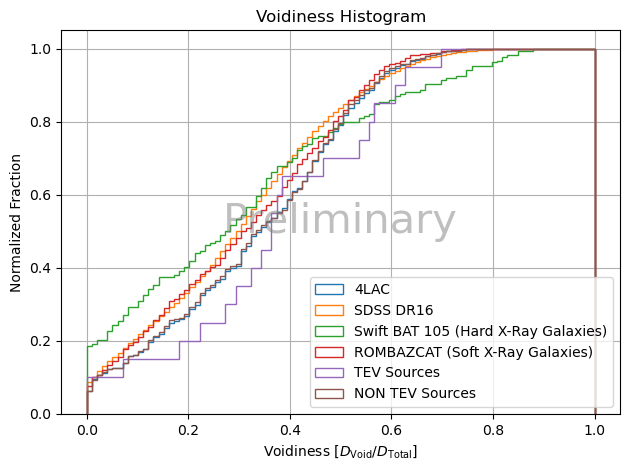

In [81]:
# Everything to be plotted on the histogram will be appended to the master lisst
# if something needs to be changed for a specific histogram, edit the relavent 
# bit of code
VOIDINESS_DATA = [] # list of panda series with voidiness data.
LABELS = []
BINS = []
# density = []

# 4LAC DATA
VOIDINESS_DATA.append(four_lac.Voidiness)
LABELS.append("4LAC")
BINS.append(15)
# density.append(True)

# SDSS DR16 Optical Galaxies
VOIDINESS_DATA.append(sdss_dr16.Voidiness)
LABELS.append("SDSS DR16")
BINS.append(45)
# density.append(True)

# SDSS DR16 Optical Galaxies
VOIDINESS_DATA.append(xray_agns.Voidiness)
LABELS.append("Swift BAT 105 (Hard X-Ray Galaxies)")
BINS.append(15)

# Soft xrays ROMBAZCAT
VOIDINESS_DATA.append(soft_xrays.Voidiness)
LABELS.append("ROMBAZCAT (Soft X-Ray Galaxies)")
BINS.append(17)

# TEV Sources
tev_mask = four_lac.TeVflag == 1
VOIDINESS_DATA.append(four_lac.Voidiness[tev_mask])
LABELS.append("TEV Sources")
BINS.append(10)

# Non TEV Sources
VOIDINESS_DATA.append(four_lac.Voidiness[np.isnan(four_lac.TeVflag)])
LABELS.append("NON TEV Sources")
BINS.append(10)
BINS = [np.linspace(0, 1, 100)] * 6
custom_plot_hist(VOIDINESS_DATA, LABELS, BINS, cumulative=True)

In [82]:
len(sdss_dr16)

92730

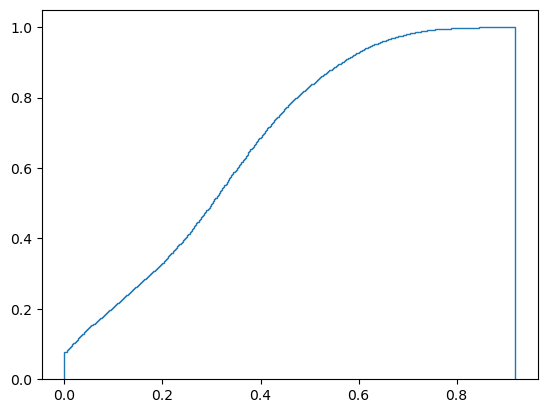

In [83]:
plt.hist([sdss_dr16.Voidiness], 
            bins=400, 
            histtype="step", 
            density=True, 
            stacked=False,
            cumulative=True)
plt.show()
# plt.scatter(centers,test[0])

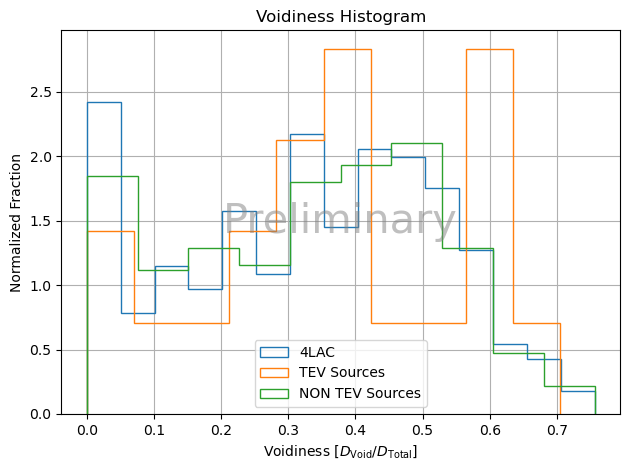

In [84]:
VOIDINESS_DATA = [] # list of panda series with voidiness data.
LABELS = []
BINS = []
# 4LAC DATA
VOIDINESS_DATA.append(four_lac.Voidiness)
LABELS.append("4LAC")
BINS.append(15)

# TEV Sources

VOIDINESS_DATA.append(four_lac.Voidiness[four_lac.TeVflag == 1])
LABELS.append("TEV Sources")
BINS.append(10)

# Non TEV Sources
VOIDINESS_DATA.append(four_lac.Voidiness[np.isnan(four_lac.TeVflag)])
LABELS.append("NON TEV Sources")
BINS.append(10)

custom_plot_hist(VOIDINESS_DATA, LABELS, BINS)

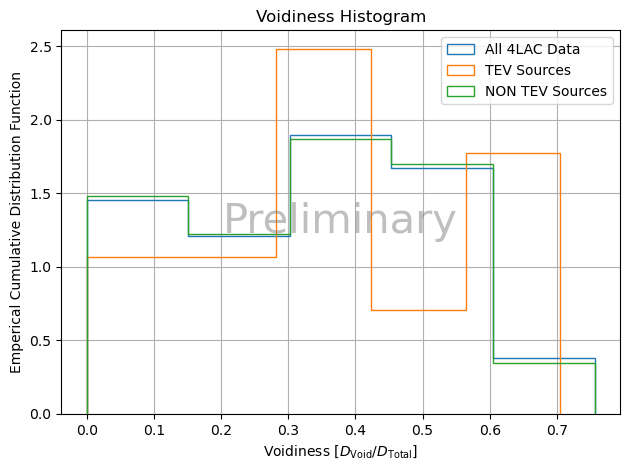

In [85]:
cum_lol = False
bins = 5
# Unormalized
plt.hist([four_lac.Voidiness], 
    bins=bins, 
    histtype="step", 
    density=True, 
    stacked=False,
    label='All 4LAC Data',
    cumulative=cum_lol)

plt.hist([four_lac.Voidiness[four_lac.TeVflag == 1]], 
    bins=bins, 
    histtype="step", 
    density=True, 
    stacked=False,
    label='TEV Sources',
    cumulative=cum_lol)

plt.hist([four_lac.Voidiness[np.isnan(four_lac.TeVflag)]], 
    bins=bins, 
    histtype="step", 
    density=True, 
    stacked=False,
    label='NON TEV Sources',
    cumulative=cum_lol)


plt.xlabel('Voidiness [$D_{\\rm Void}/D_{\\rm Total}$]')
plt.ylabel('Emperical Cumulative Distribution Function')
plt.title('Voidiness Histogram')

plt.grid()

plt.legend()

plt.text(0.5, 0.5, 'Preliminary',  # Adjust the position as needed
            fontsize=30, color='gray', alpha=0.5,
            ha='center', va='center', transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()


In [86]:
len(four_lac.Voidiness[np.isnan(four_lac.TeVflag)])

308

In [87]:
np.isnan(four_lac.TeVflag)

Unnamed: 0
1107     True
1108     True
1120     True
1130     True
1131     True
        ...  
2542     True
2553     True
2554    False
2567     True
2577     True
Name: TeVflag, Length: 328, dtype: bool

In [88]:
len(soft_xrays)

445

In [89]:
# Clean the data in the SED_class
for idx in list(four_lac.index):
    data = four_lac.SED_class[idx]
    if type(data) == str:
        four_lac.at[idx, 'SED_class'] = data[2:5] # Grabs the 3 characters, HSP ISP, LSP
# Plottinf just the 4lac distribution then filter by SED_class
# Since the data mixes strings with np.nans i need to do somthing a little messier
hsp_list = []
isp_list = []
lsp_list = []
nan_list = []
for i, _ in four_lac.iterrows():
    dat = four_lac.SED_class[i]
    if type(dat) == str:
        if dat == 'HSP':
            hsp_list.append(i)
        elif dat == 'ISP':
            isp_list.append(i)
        elif dat == 'LSP':
            lsp_list.append(i)
        else:
            Exception(f'Something went wrong. Dat = {dat}')
    elif np.isnan(dat): # last check to be sure
        nan_list.append(i)
    else:
        TypeError

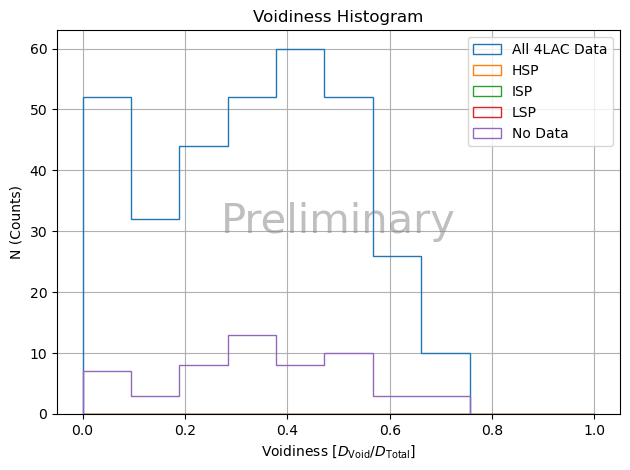

In [90]:
# Unormalized
plt.hist([four_lac.Voidiness], 
    bins=8, 
    histtype="step", 
    density=False, 
    stacked=False,
    label='All 4LAC Data')

plt.hist([four_lac.Voidiness[hsp_list]], 
    bins=8, 
    histtype="step", 
    density=False, 
    stacked=False,
    label='HSP')

plt.hist([four_lac.Voidiness[isp_list]], 
    bins=8, 
    histtype="step", 
    density=False, 
    stacked=False,
    label='ISP')
    
plt.hist([four_lac.Voidiness[lsp_list]], 
    bins=8, 
    histtype="step", 
    density=False, 
    stacked=False,
    label='LSP')

plt.hist([four_lac.Voidiness[nan_list]], 
    bins=8, 
    histtype="step", 
    density=False, 
    stacked=False,
    label='No Data')

plt.xlabel('Voidiness [$D_{\\rm Void}/D_{\\rm Total}$]')
plt.ylabel('N (Counts)')
plt.title('Voidiness Histogram')

plt.grid()

plt.legend()

plt.text(0.5, 0.5, 'Preliminary',  # Adjust the position as needed
            fontsize=30, color='gray', alpha=0.5,
            ha='center', va='center', transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()


In [91]:
# Calculating luminosity
four_lac["L1000"] = four_lac.Flux1000 * 4 * np.pi * (four_lac.cmvd_Mpc * 3.08567758128e24)**2

In [92]:

four_lac["Unc_L1000"] = (four_lac.Unc_Flux1000/four_lac.Flux1000)*four_lac.L1000

/var/folders/pj/_3cv5_xd2sz143_b3_wm1xk40000gn/T/ipykernel_48351/3115155416.py:11: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(linear_model, four_lac.Voidiness, four_lac.L1000, sigma=four_lac.Unc_L1000)


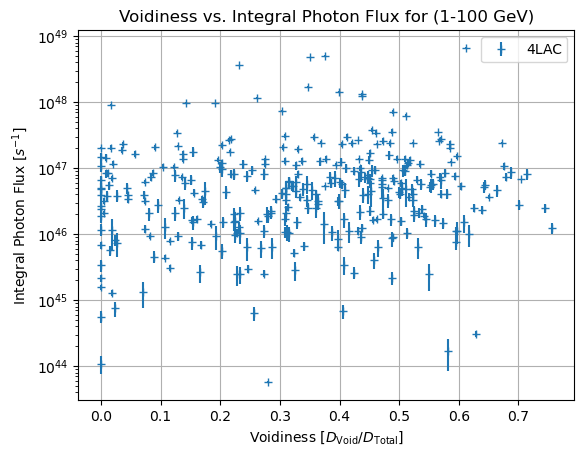

In [93]:
# # Curve fit
# # https://faculty1.coloradocollege.edu/~sburns/LinearFitting/SimpleDataFittingWithError.html
# # According to this we should use sigma=True
# from scipy.optimize import curve_fit
# from sklearn.metrics import r2_score

# def linear_model(x, a, b):
#     return a * x + b


# popt, pcov = curve_fit(linear_model, four_lac.Voidiness, four_lac.L1000, sigma=four_lac.Unc_L1000)
# slope, intercept = popt
# four_lac['L1000_FIT'] = linear_model(np.array(four_lac.Voidiness), slope, intercept)
# stats_data = {'L1000_FIT_slope': slope, 'L1000_FIT_r2': r2_score(four_lac.L1000, four_lac.L1000_FIT)}


# # popt, pcov = curve_fit(linear_model, four_lac.Voidiness, four_lac.Energy_Flux100, sigma=four_lac.Unc_Energy_Flux100)
# # slope, intercept = popt
# # four_lac['Energy_Flux100_FIT'] = linear_model(np.array(four_lac.Voidiness), slope, intercept)
# # stats_data['Energy_Flux100_FIT_slope'] = slope
# # stats_data['Energy_Flux100_FIT_r2'] = r2_score(four_lac.Energy_Flux100, four_lac.Energy_Flux100_FIT)
# # GRS ONly
# # """Voidines v. Power Law Index PL_Index
# # Voidiness v. Flux
# # """
# key = "L1000"
# plt.errorbar(four_lac.Voidiness, four_lac[key], 
#              yerr=four_lac["Unc_"+key],
#              linestyle='',
#              marker='+',
#              label='4LAC')
# # plt.scatter(four_lac.Voidiness, four_lac[key+"_FIT"], color='orange', label = f"Curve Fit slope: {stats_data[key + '_FIT_slope']:.2e}\n $R^2$: {stats_data[key + '_FIT_r2']:.2e}")
# plt.yscale('log')
# plt.title(f'Voidiness vs. Integral Photon Flux for (1-100 GeV)')
# plt.xlabel("Voidiness [$D_{\\rm Void}/D_{\\rm Total}$]")
# plt.ylabel("Integral Photon Flux [$ s^{-1}$] ")
# plt.grid()
# plt.legend()

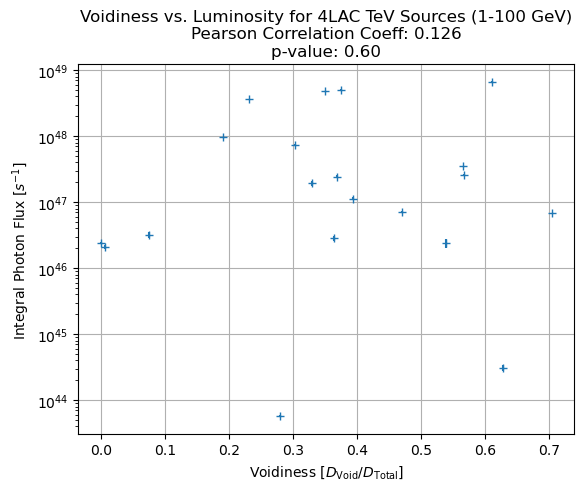

In [101]:
# Curve fit
# https://faculty1.coloradocollege.edu/~sburns/LinearFitting/SimpleDataFittingWithError.html
# According to this we should use sigma=True
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

def linear_model(x, a, b):
    return a * x + b

# tevs_four_lac = four_lac[mask].copy()
# popt, pcov = curve_fit(linear_model, tevs_four_lac.Voidiness, tevs_four_lac.L1000, sigma=tevs_four_lac.Unc_L1000)
# slope, intercept = popt
# tevs_four_lac['L1000_FIT'] = linear_model(np.array(tevs_four_lac.Voidiness), slope, intercept)
# stats_data = {'L1000_FIT_slope': slope, 'L1000_FIT_r2': r2_score(tevs_four_lac.L1000, tevs_four_lac.L1000_FIT)}


# popt, pcov = curve_fit(linear_model, tevs_four_lac.Voidiness, tevs_four_lac.Energy_Flux100, sigma=tevs_four_lac.Unc_Energy_Flux100)
# slope, intercept = popt
# tevs_four_lac['Energy_Flux100_FIT'] = linear_model(np.array(tevs_four_lac.Voidiness), slope, intercept)
# stats_data['Energy_Flux100_FIT_slope'] = slope
# stats_data['Energy_Flux100_FIT_r2'] = r2_score(tevs_four_lac.Energy_Flux100, tevs_four_lac.Energy_Flux100_FIT)
# GRS ONly
# """Voidines v. Power Law Index PL_Index
# Voidiness v. Flux
# """
mask = tev_mask
key = "L1000"
plt.errorbar(four_lac.Voidiness[mask], four_lac.L1000[mask], 
             yerr=four_lac.Unc_L1000[mask],
             linestyle='',
             marker='+',
             label='4LAC')
corr_test= stats.pearsonr(four_lac.Voidiness[mask], four_lac[key][mask])
# plt.scatter(tevs_four_lac.Voidiness, tevs_four_lac[key+"_FIT"], color='orange', label = f"Curve Fit slope: {stats_data[key + '_FIT_slope']:.2e}\n $R^2$: {stats_data[key + '_FIT_r2']:.2e}")
plt.yscale('log')
plt.title(f'Voidiness vs. Luminosity for 4LAC TeV Sources (1-100 GeV)' +
          f"\nPearson Correlation Coeff: {corr_test[0]:.3f}"+
          f"\np-value: {corr_test[1]:.2f}")
plt.xlabel("Voidiness [$D_{\\rm Void}/D_{\\rm Total}$]")
plt.ylabel("Integral Photon Flux [$ s^{-1}$] ")
plt.grid()
# plt.legend()

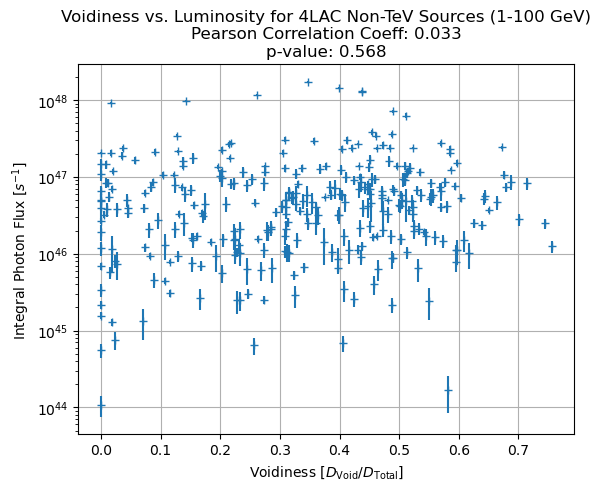

In [107]:
# Curve fit
# https://faculty1.coloradocollege.edu/~sburns/LinearFitting/SimpleDataFittingWithError.html
# According to this we should use sigma=True
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

def linear_model(x, a, b):
    return a * x + b

# tevs_four_lac = four_lac[mask].copy()
# popt, pcov = curve_fit(linear_model, tevs_four_lac.Voidiness, tevs_four_lac.L1000, sigma=tevs_four_lac.Unc_L1000)
# slope, intercept = popt
# tevs_four_lac['L1000_FIT'] = linear_model(np.array(tevs_four_lac.Voidiness), slope, intercept)
# stats_data = {'L1000_FIT_slope': slope, 'L1000_FIT_r2': r2_score(tevs_four_lac.L1000, tevs_four_lac.L1000_FIT)}


# popt, pcov = curve_fit(linear_model, tevs_four_lac.Voidiness, tevs_four_lac.Energy_Flux100, sigma=tevs_four_lac.Unc_Energy_Flux100)
# slope, intercept = popt
# tevs_four_lac['Energy_Flux100_FIT'] = linear_model(np.array(tevs_four_lac.Voidiness), slope, intercept)
# stats_data['Energy_Flux100_FIT_slope'] = slope
# stats_data['Energy_Flux100_FIT_r2'] = r2_score(tevs_four_lac.Energy_Flux100, tevs_four_lac.Energy_Flux100_FIT)
# GRS ONly
# """Voidines v. Power Law Index PL_Index
# Voidiness v. Flux
# """
mask = ~tev_mask
key = "L1000"
plt.errorbar(four_lac.Voidiness[mask], four_lac.L1000[mask], 
             yerr=four_lac.Unc_L1000[mask],
             linestyle='',
             marker='+',
             label='4LAC')
corr_test= stats.pearsonr(four_lac.Voidiness[mask], four_lac[key][mask])
# plt.scatter(tevs_four_lac.Voidiness, tevs_four_lac[key+"_FIT"], color='orange', label = f"Curve Fit slope: {stats_data[key + '_FIT_slope']:.2e}\n $R^2$: {stats_data[key + '_FIT_r2']:.2e}")
plt.yscale('log')
plt.title(f'Voidiness vs. Luminosity for 4LAC Non-TeV Sources (1-100 GeV)' +
          f"\nPearson Correlation Coeff: {corr_test[0]:.3f}"+
          f"\np-value: {corr_test[1]:.3f}")
plt.xlabel("Voidiness [$D_{\\rm Void}/D_{\\rm Total}$]")
plt.ylabel("Integral Photon Flux [$ s^{-1}$] ")
plt.grid()
# plt.legend()

Text(0, 0.5, 'Spectral Index')

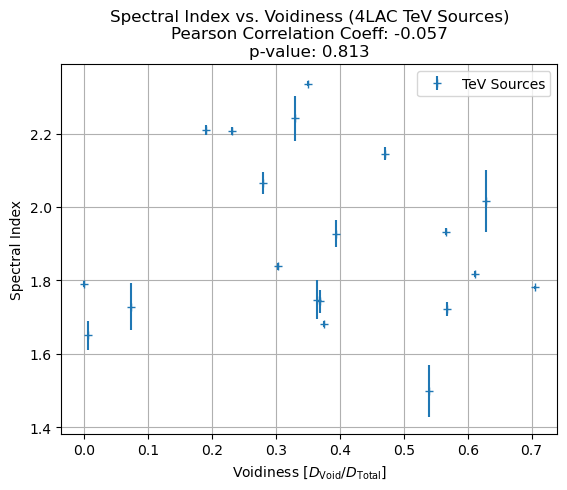

In [114]:

key = "PL_Index"
mask=tev_mask

# popt, pcov = curve_fit(linear_model, four_lac[mask].Voidiness, four_lac[mask].PL_Index, 
#                        sigma=four_lac[mask].Unc_PL_Index, 
#                        absolute_sigma=True)
# slope, intercept = popt
# four_lac[mask]['PL_Index_FIT'] = linear_model(np.array(four_lac[mask].Voidiness), slope, intercept)
# stats_data = {'PL_Index_FIT_slope': slope, 'PL_Index_FIT_r2': r2_score(four_lac[mask].PL_Index, four_lac[mask].PL_Index_FIT)}
# #
# plt.plot(four_lac[mask].Voidiness, four_lac[mask].PL_Index_FIT, marker='o',
#              label = f"Curve Fit slope: {stats_data[key + '_FIT_slope']:.2e}\n $R^2$: {stats_data[key + '_FIT_r2']:.2e}")

plt.errorbar(four_lac[mask].Voidiness, four_lac[mask].PL_Index, 
             yerr=four_lac[mask].Unc_PL_Index, 
             linestyle='', 
             marker = "+",
             label="TeV Sources")

corr_test= stats.pearsonr(four_lac.Voidiness[mask], four_lac[key][mask])

plt.grid()
plt.legend()
# plt.yscale('log')
plt.title("Spectral Index vs. Voidiness (4LAC TeV Sources)" +
          f"\nPearson Correlation Coeff: {corr_test[0]:.3f}"+
          f"\np-value: {corr_test[1]:.3f}")
plt.xlabel("Voidiness [$D_{\\rm Void}/D_{\\rm Total}$]")
plt.ylabel("Spectral Index")

Text(0, 0.5, 'Spectral Index')

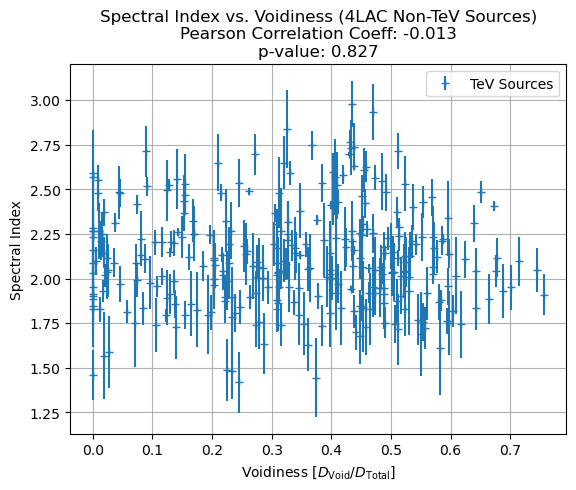

In [109]:

key = "PL_Index"
mask=~tev_mask

# popt, pcov = curve_fit(linear_model, four_lac[mask].Voidiness, four_lac[mask].PL_Index, 
#                        sigma=four_lac[mask].Unc_PL_Index, 
#                        absolute_sigma=True)
# slope, intercept = popt
# four_lac[mask]['PL_Index_FIT'] = linear_model(np.array(four_lac[mask].Voidiness), slope, intercept)
# stats_data = {'PL_Index_FIT_slope': slope, 'PL_Index_FIT_r2': r2_score(four_lac[mask].PL_Index, four_lac[mask].PL_Index_FIT)}
# #
# plt.plot(four_lac[mask].Voidiness, four_lac[mask].PL_Index_FIT, marker='o',
#              label = f"Curve Fit slope: {stats_data[key + '_FIT_slope']:.2e}\n $R^2$: {stats_data[key + '_FIT_r2']:.2e}")

plt.errorbar(four_lac[mask].Voidiness, four_lac[mask].PL_Index, 
             yerr=four_lac[mask].Unc_PL_Index, 
             linestyle='', 
             marker = "+",
             label="TeV Sources")

corr_test= stats.pearsonr(four_lac.Voidiness[mask], four_lac[key][mask])

plt.grid()
# plt.legend()
# plt.yscale('log')
plt.title("Spectral Index vs. Voidiness (4LAC Non-TeV Sources)" +
          f"\nPearson Correlation Coeff: {corr_test[0]:.3f}"+
          f"\np-value: {corr_test[1]:.3f}")
plt.xlabel("Voidiness [$D_{\\rm Void}/D_{\\rm Total}$]")
plt.ylabel("Spectral Index")

In [110]:
# The division

four_lac['Flux1000_EFlux100'] = four_lac.Flux1000/four_lac.Energy_Flux100

# error propagation.
rel_err_1000 = four_lac.Unc_Flux1000/four_lac.Flux1000
rel_err_100 = four_lac.Unc_Energy_Flux100/four_lac.Energy_Flux100
new_rel_error = rel_err_1000 + rel_err_100

four_lac['Unc_Flux1000_EFlux100'] = new_rel_error * four_lac.Flux1000_EFlux100

Text(0, 0.5, 'Flux1000/Energy Flux 100')

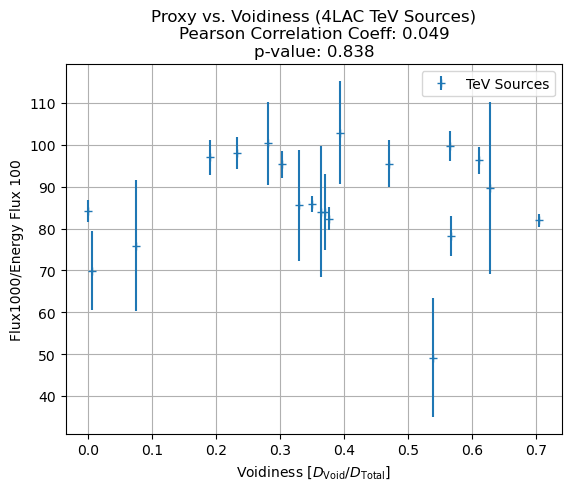

In [112]:

key = "Flux1000_EFlux100"
mask  = tev_mask
# popt, pcov = curve_fit(linear_model, four_lac.Voidiness, four_lac.Flux1000_EFlux100, 
#                        sigma=four_lac.Flux1000_EFlux100, 
#                        absolute_sigma=True)
# slope, intercept = popt
# four_lac['Flux1000_EFlux100_FIT'] = linear_model(np.array(four_lac.Voidiness), slope, intercept)
# stats_data = {'Flux1000_EFlux100_FIT_slope': slope, 'Flux1000_EFlux100_FIT_r2': r2_score(four_lac.Flux1000_EFlux100, four_lac.Flux1000_EFlux100_FIT)}
# #
# plt.plot(four_lac.Voidiness, four_lac.Flux1000_EFlux100_FIT, marker='o',
#              label = f"Curve Fit slope: {stats_data[key + '_FIT_slope']:.2e}\n $R^2$: {stats_data[key + '_FIT_r2']:.2e}")

plt.errorbar(four_lac[mask].Voidiness, four_lac[mask].Flux1000_EFlux100, 
             yerr=four_lac[mask].Unc_Flux1000_EFlux100, 
             linestyle='', 
             marker = "+",
             label="TeV Sources")
corr_test= stats.pearsonr(four_lac.Voidiness[mask], four_lac[key][mask])
plt.grid()
plt.legend()
# plt.yscale('log')
plt.title("Proxy vs. Voidiness (4LAC TeV Sources)"+
          f"\nPearson Correlation Coeff: {corr_test[0]:.3f}"+
          f"\np-value: {corr_test[1]:.3f}")
plt.xlabel("Voidiness [$D_{\\rm Void}/D_{\\rm Total}$]")
plt.ylabel("Flux1000/Energy Flux 100")

Text(0, 0.5, 'Flux1000/Energy Flux 100')

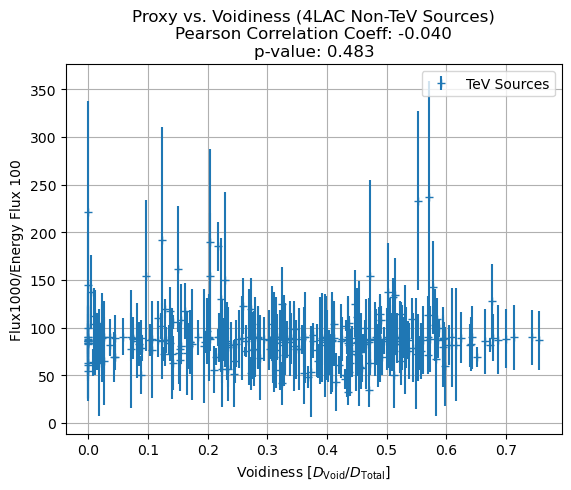

In [115]:

key = "Flux1000_EFlux100"
mask  = ~tev_mask
# popt, pcov = curve_fit(linear_model, four_lac.Voidiness, four_lac.Flux1000_EFlux100, 
#                        sigma=four_lac.Flux1000_EFlux100, 
#                        absolute_sigma=True)
# slope, intercept = popt
# four_lac['Flux1000_EFlux100_FIT'] = linear_model(np.array(four_lac.Voidiness), slope, intercept)
# stats_data = {'Flux1000_EFlux100_FIT_slope': slope, 'Flux1000_EFlux100_FIT_r2': r2_score(four_lac.Flux1000_EFlux100, four_lac.Flux1000_EFlux100_FIT)}
# #
# plt.plot(four_lac.Voidiness, four_lac.Flux1000_EFlux100_FIT, marker='o',
#              label = f"Curve Fit slope: {stats_data[key + '_FIT_slope']:.2e}\n $R^2$: {stats_data[key + '_FIT_r2']:.2e}")

plt.errorbar(four_lac[mask].Voidiness, four_lac[mask].Flux1000_EFlux100, 
             yerr=four_lac[mask].Unc_Flux1000_EFlux100, 
             linestyle='', 
             marker = "+",
             label="TeV Sources")
corr_test= stats.pearsonr(four_lac.Voidiness[mask], four_lac[key][mask])
plt.grid()
plt.legend()
# plt.yscale('log')
plt.title("Proxy vs. Voidiness (4LAC Non-TeV Sources)"+
          f"\nPearson Correlation Coeff: {corr_test[0]:.3f}"+
          f"\np-value: {corr_test[1]:.3f}")
plt.xlabel("Voidiness [$D_{\\rm Void}/D_{\\rm Total}$]")
plt.ylabel("Flux1000/Energy Flux 100")